In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [82]:
a=1+np.asarray(range(12)).reshape(3,4)
print(a.shape[1])


4


In [2]:
def calcLosses(labels,preds):
    '''Calculates the cross-entropy losses netween labels and prediction probabilities for CCR and CCR1 labeling
    
    :param: labels: Ground truth labels
    :param: preds: Prediction probabilities for classes
    
    :retur: CCR and CCR1 cross entropy losses respectively
    '''
    
    n=len(labels)
    loss_single=np.zeros(n)
    loss_multi=np.zeros(n)
    for k in range(n):
        label_k=labels[k]
        loss_single[k]=preds[k,label_k]
        if label_k==0:
            loss_multi[k]=(preds[k,0]+preds[k,1])*.5
        elif label_k==preds.shape[1]-1:
            loss_multi[k]=(preds[k,preds.shape[1]-1]+preds[k,preds.shape[1]-2])*.5
        else:
            loss_multi[k]=(preds[k,label_k-1]+preds[k,label_k]+preds[k,label_k+1])/3

    return -1.*np.mean(np.log(loss_single)), -1.*np.mean(np.log(loss_multi))





The labels are [0 1 2 3 4 5]
Number of examples is 1000
---
Prediction probabilities for the first examples
[[ 0.19310997  0.23808536  0.05992829  0.21293602  0.0497733   0.24616706]
 [ 0.24150093  0.18315404  0.03362513  0.14942579  0.19664171  0.1956524 ]
 [ 0.18718494  0.2115796   0.28907222  0.06787705  0.08408379  0.1602024 ]
 [ 0.17872779  0.22220113  0.13187128  0.03716516  0.23200529  0.19802935]
 [ 0.22337138  0.22035093  0.12942095  0.07413831  0.08345361  0.26926482]]
---
Predicted labels are [0 1 2 3 4 5]
Number of examples is 1000
---


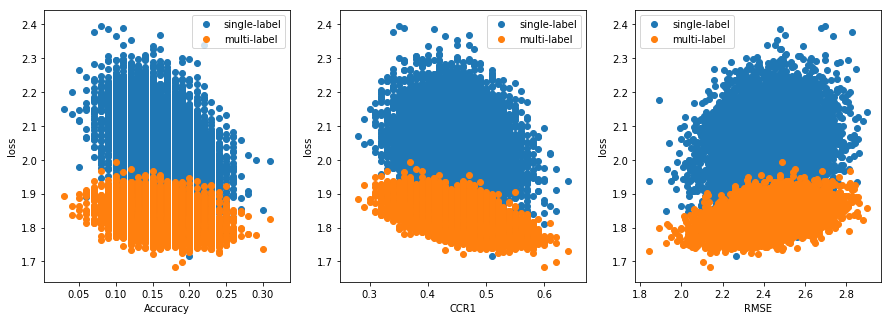

In [25]:
'''Declare the parameters'''
numOfExamples=1000 #Number of random data points
numOfClasses=6 #Number of different labels
numOfTrials=10000 #Number of different trials 
numOfTrialExamples=100 #Number of examples to use in each trial

'''Create random labels (ground truths)'''
labels=np.floor(np.random.rand(numOfExamples)*numOfClasses).astype(np.int)
print('The labels are '+str(np.unique(labels)))
print('Number of examples is '+str(len(labels)))
print('---')

'''Create random prediction probabilities'''
preds=np.random.rand(numOfExamples,numOfClasses)
'''Normalize the rows to make it look like a probability'''
row_sums=preds.sum(axis=1)
preds=preds/row_sums[:,np.newaxis]
print('Prediction probabilities for the first examples')
print(preds[:5,:])
print('---')

'''Calculate the predicted labels and absolute errors'''
pred_labels=preds.argmax(axis=1)
abs_err=np.abs(labels-pred_labels)
print('Predicted labels are '+str(np.unique(pred_labels)))
print('Number of examples is '+str(len(pred_labels)))
print('---')

'''Initializiation of metrices'''
[rmse_arr, ccr_arr, ccr1_arr, single_arr, multi_arr]=[np.zeros(numOfTrials) for k in range(5)]


'''Sort everythin wrt absolute errors'''
sort_idx=np.argsort(abs_err)#[::-1]
labels=labels[sort_idx]
preds=preds[sort_idx,:]
pred_labels=pred_labels[sort_idx]

'''Create different trials'''
for k in range(numOfTrials):
    #print(str(k)+'th Trial')
    
    '''Select random elements'''
    idx=np.asarray(range(numOfExamples))
    np.random.shuffle(idx)
    idx=idx[:numOfTrialExamples]
    #idx=np.asarray(range(10*k+1))
    #print(idx)
    #print(labels[idx])
    labels_k=labels[idx]
    preds_k=preds[idx,:]
    pred_labels_k=pred_labels[idx]
    errors_k=np.abs(labels_k-pred_labels_k)
    
    '''Calculation of the metrices'''
    rmse_arr[k]=np.sqrt(np.mean(errors_k**2))
    ccr_arr[k]=np.mean(errors_k==0)
    ccr1_arr[k]=np.mean(errors_k<=1)
    single_arr[k], multi_arr[k] = calcLosses(labels_k,preds_k)
    
    '''labels_k=labels[::-(10*k+1)]
    preds_k=preds[::-(10*k+1),:]
    pred_labels_k=pred_labels[::-(10*k+1)]
    errors_k=np.abs(labels_k-pred_labels_k)
    
    #Calculation of the metrices
    rmse_arr[2*numOfTrials-k-1]=np.sqrt(np.mean(errors_k**2))
    ccr_arr[2*numOfTrials-k-1]=np.mean(errors_k==0)
    ccr1_arr[2*numOfTrials-k-1]=np.mean(errors_k<=1)
    single_arr[2*numOfTrials-k-1], multi_arr[2*numOfTrials-k-1] = calcLosses(labels_k,preds_k)'''
    
   
    
plt.figure(figsize=(15,5))

ax= plt.subplot(131)
plt.scatter(ccr_arr,single_arr,label='single-label')
plt.scatter(ccr_arr,multi_arr,label='multi-label')
plt.xlabel('Accuracy')
plt.ylabel('loss')
ax.legend()

ax= plt.subplot(132)
plt.scatter(ccr1_arr,single_arr,label='single-label')
plt.scatter(ccr1_arr,multi_arr,label='multi-label')
plt.xlabel('CCR1')
plt.ylabel('loss')
ax.legend()

ax= plt.subplot(133)
plt.scatter(rmse_arr,single_arr,label='single-label')
plt.scatter(rmse_arr,multi_arr,label='multi-label')
plt.xlabel('RMSE')
plt.ylabel('loss')
ax.legend()

[ 0.1042942   1.57862695]


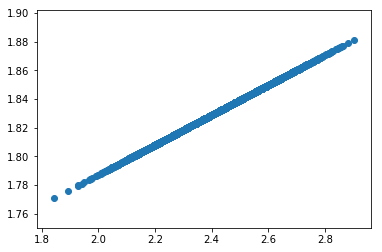

In [41]:
a=np.polyfit(rmse_arr,multi_arr,1)
print(a)
single_fit=a[0]*rmse_arr+a[1]
plt.scatter(rmse_arr,single_fit,label='single-fit')

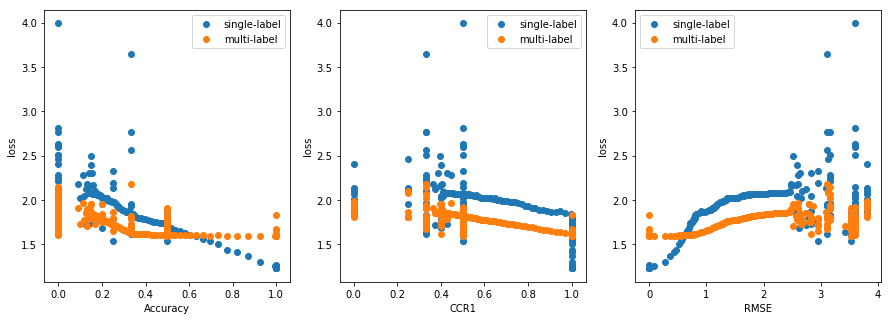

In [21]:

plt.figure(figsize=(15,5))

ax= plt.subplot(131)
plt.scatter(ccr_arr,single_arr,label='single-label')
plt.scatter(ccr_arr,multi_arr,label='multi-label')
plt.xlabel('Accuracy')
plt.ylabel('loss')
ax.legend()

ax= plt.subplot(132)
plt.scatter(ccr1_arr,single_arr,label='single-label')
plt.scatter(ccr1_arr,multi_arr,label='multi-label')
plt.xlabel('CCR1')
plt.ylabel('loss')
ax.legend()

ax= plt.subplot(133)
plt.scatter(rmse_arr,single_arr,label='single-label')
plt.scatter(rmse_arr,multi_arr,label='multi-label')
plt.xlabel('RMSE')
plt.ylabel('loss')
ax.legend()


In [150]:
print(np.linspace(1,5,3))

[ 1.  3.  5.]


In [45]:

def histByRef(ref,dest,bins):
    num_of_bins=len(bins)-1
    out_arr=np.zeros(num_of_bins)
    
    for k in range(num_of_bins):
        idx=np.asarray(ref>=bins[k]).astype(np.int) + np.asarray(ref <bins[k+1]).astype(np.int)
        out_arr[k]=np.mean(dest[idx>=2])
        
    return out_arr





/home/mtezcan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mtezcan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


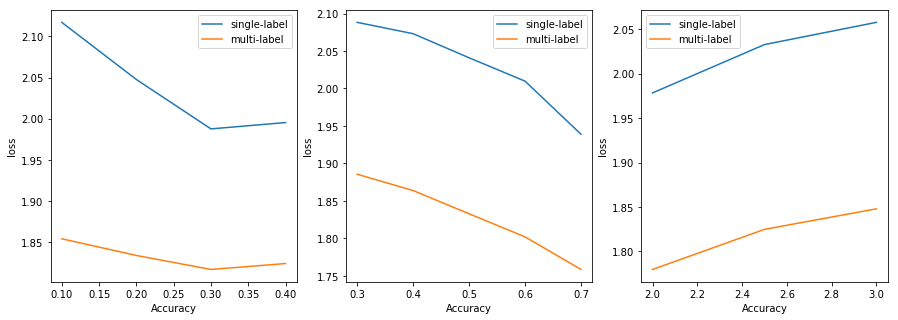

In [48]:
plt.figure(figsize=(15,5))

bins=np.linspace(0,1,11)
hist_single=histByRef(ccr_arr,single_arr,bins)
hist_multi=histByRef(ccr_arr,multi_arr,bins)
ax= plt.subplot(131)
plt.plot(bins[1:],hist_single,label='single-label')
plt.plot(bins[1:],hist_multi,label='multi-label')
plt.xlabel('Accuracy')
plt.ylabel('loss')
ax.legend()

bins=np.linspace(0,1,11)
hist_single=histByRef(ccr1_arr,single_arr,bins)
hist_multi=histByRef(ccr1_arr,multi_arr,bins)
ax= plt.subplot(132)
plt.plot(bins[1:],hist_single,label='single-label')
plt.plot(bins[1:],hist_multi,label='multi-label')
plt.xlabel('Accuracy')
plt.ylabel('loss')
ax.legend()

bins=np.linspace(0,5,11)
hist_single=histByRef(rmse_arr,single_arr,bins)
hist_multi=histByRef(rmse_arr,multi_arr,bins)
ax= plt.subplot(133)
plt.plot(bins[1:],hist_single,label='single-label')
plt.plot(bins[1:],hist_multi,label='multi-label')
plt.xlabel('Accuracy')
plt.ylabel('loss')
ax.legend()